In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
dataset=pd.read_csv("Advertising.csv")

In [4]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
dataset.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [6]:
df=dataset[['TV','Newspaper','Radio']]
columns = ['TV','Newspaper','Radio']
df

,TV,Newspaper,Radio
0,230.1,69.2,37.8
1,44.5,45.1,39.3
2,17.2,69.3,45.9
3,151.5,58.5,41.3
4,180.8,58.4,10.8
...,...,...,...
195,38.2,13.8,3.7
196,94.2,8.1,4.9
197,177.0,6.4,9.3
198,283.6,66.2,42.0


In [ ]:
x = dataset[columns].values.reshape(-1, 3)  
y = dataset['Sales'].values.reshape(-1, 1) 
print(x.shape)
print(y.shape)
print(x)

In [ ]:
X = dataset[columns].values.reshape(-1, 3)  
Y = dataset['Sales'].values.reshape(-1, 1) 
print(X)

In [9]:
X = np.column_stack((X[:, 0] * X[:, 1], X[:, 0] * X[:, 2], X[:, 1] * X[:, 2], X[:, 0] ** 2, X[:, 1] ** 2, X[:, 2] ** 2, X))
X.shape

(200, 9)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train)

[[2.67960e+03 8.93200e+02 1.77870e+02 ... 1.16000e+02 2.31000e+01
  7.70000e+00]
 [1.13280e+03 1.64610e+03 5.95200e+01 ... 1.77000e+02 6.40000e+00
  9.30000e+00]
 [1.51281e+03 1.15077e+03 9.37170e+02 ... 4.31000e+01 3.51000e+01
  2.67000e+01]
 ...
 [1.28443e+04 7.29295e+03 1.97650e+03 ... 2.17700e+02 5.90000e+01
  3.35000e+01]
 [2.91456e+03 1.65600e+03 1.76000e+02 ... 1.65600e+02 1.76000e+01
  1.00000e+01]
 [5.99628e+03 2.83002e+03 2.16140e+02 ... 2.80200e+02 2.14000e+01
  1.01000e+01]]


In [ ]:
X_train.shape
print(X[:10])

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
means = scaler.mean_
scales = np.sqrt(scaler.var_)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = (X_test - means)/scales
print(X_test_scaled)

In [13]:
ones_column = np.ones((X_train_scaled.shape[0], 1))
ones_column2 = np.ones((X_test_scaled.shape[0], 1))
X_train_scaled = np.hstack((X_train_scaled, ones_column))
X_test_scaled = np.hstack((X_test_scaled, ones_column2))
print(X_test_scaled)

[[ 8.80626951e-01  5.01838751e-01  9.76876694e-01 -1.14868405e-01
   9.42058287e-01  3.53971232e-01  1.57812165e-01  1.13227461e+00
   5.91127268e-01  1.00000000e+00]
 [ 1.24415002e+00  1.75835198e+00  1.93264278e+00  3.37942156e-01
   9.42058287e-01  2.10942255e+00  5.39252835e-01  1.13227461e+00
   1.68199613e+00  1.00000000e+00]
 [ 1.74008652e+00  1.44681051e+00  4.72919345e-01  2.21022509e+00
   3.52960294e-01  8.21831001e-02  1.69783431e+00  6.53800957e-01
   3.67533029e-01  1.00000000e+00]
 [-8.55484765e-01 -9.26299991e-01  9.72657224e-01 -1.15818806e+00
   4.64691550e-01  8.53150073e-01 -1.64363349e+00  7.52455319e-01
   9.50233166e-01  1.00000000e+00]
 [-8.17781414e-01  2.20357258e+00 -7.23075988e-01  7.45003170e-01
  -8.19965110e-01  2.28226864e+00  8.35136719e-01 -1.31928629e+00
   1.77007871e+00  1.00000000e+00]
 [-1.21427584e-01 -2.62821262e-01  1.17086010e+00 -9.41772181e-01
   9.28711204e-01  6.65316933e-01 -8.90258461e-01  1.12240918e+00
   8.21497089e-01  1.00000000e+00

In [14]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta=np.random.randn(10,1)
print('Theta:',theta)

Theta: [[ 1.76405235]
 [ 0.40015721]
 [ 0.97873798]
 [ 2.2408932 ]
 [ 1.86755799]
 [-0.97727788]
 [ 0.95008842]
 [-0.15135721]
 [-0.10321885]
 [ 0.4105985 ]]


In [15]:
def model(X, theta):
    return X.dot(theta)

In [16]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [17]:
cost_function(X_train_scaled, y_train, theta)

118.87367827385106

In [18]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [19]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [20]:
n_iterations = 200
learning_rate = 0.4

theta_final, cost_history = gradient_descent(X_train_scaled, y_train, theta, learning_rate, n_iterations)


In [21]:
theta_final

array([[-4.04890642e-02],
       [ 1.38840439e+00],
       [ 2.12030183e-01],
       [-2.23724536e+00],
       [-7.30099932e-03],
       [ 8.34343929e-01],
       [ 5.91873651e+00],
       [-9.09768044e-03],
       [-2.89400208e-01],
       [ 1.53306250e+01]])

In [22]:
predictions = model(X_train_scaled, theta_final)
predictions

array([[12.65444937],
       [15.68273938],
       [ 9.2151409 ],
       [ 9.72164607],
       [16.87720215],
       [ 7.94322745],
       [10.46688772],
       [15.56976421],
       [11.94616934],
       [11.53005826],
       [13.81333362],
       [15.14724597],
       [ 8.75732673],
       [ 7.4560522 ],
       [10.23784788],
       [13.23330351],
       [10.62920229],
       [25.08664023],
       [ 7.03071345],
       [16.07166326],
       [19.44808347],
       [17.16333199],
       [13.12874118],
       [ 8.56863231],
       [18.81378934],
       [ 6.89228529],
       [22.20110536],
       [ 6.74257886],
       [13.44352865],
       [ 8.60331175],
       [11.88150909],
       [10.44579636],
       [17.01441069],
       [18.40208027],
       [16.16061712],
       [18.1794336 ],
       [15.86768312],
       [20.1464939 ],
       [16.93110675],
       [22.15245521],
       [ 9.10688814],
       [14.46667334],
       [11.30798267],
       [18.37582817],
       [10.46312909],
       [17

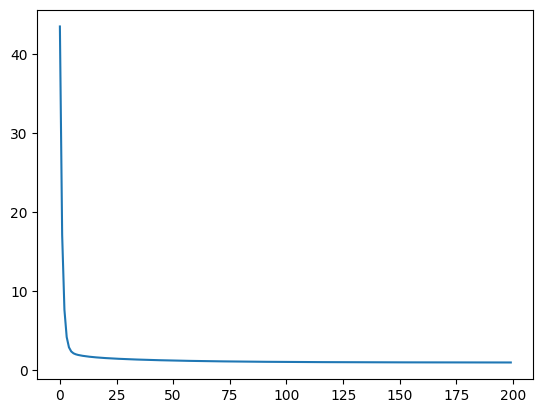

In [23]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [24]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [25]:
train_prediction = coef_determination(y_train, predictions)
print("Coeff de determination pour train : ",train_prediction *100 ,"%")
predictions = model(X_test_scaled, theta_final)
test_prediction = coef_determination(y_test, predictions)
print("Coeff de determination pour test :",test_prediction*100,"%")



Coeff de determination pour train :  92.82301981341861 %
Coeff de determination pour test : 95.15073596767617 %


#### Moyenne des erreurs

In [26]:
y_test_pred = model(X_test_scaled, theta_final)
MAE = mean_absolute_error(y_test, y_test_pred)
MSE = mean_squared_error(y_test, y_test_pred)  
RMSE =  np.sqrt(MSE)  
print('MAE:', MAE)
print('MSE:', MSE)
print('RMSE:', RMSE)


MAE: 0.9291998042974756
MSE: 1.4984759278924198
RMSE: 1.2241225134325484


In [27]:
y_train_pred = model(X_train_scaled, theta_final)

train_R2 = r2_score(y_train, y_train_pred)
test_R2 = r2_score(y_test, y_test_pred)

print('Train R2:', train_R2)
print('Test R2:', test_R2)

Train R2: 0.9282301981341861
Test R2: 0.9515073596767617
